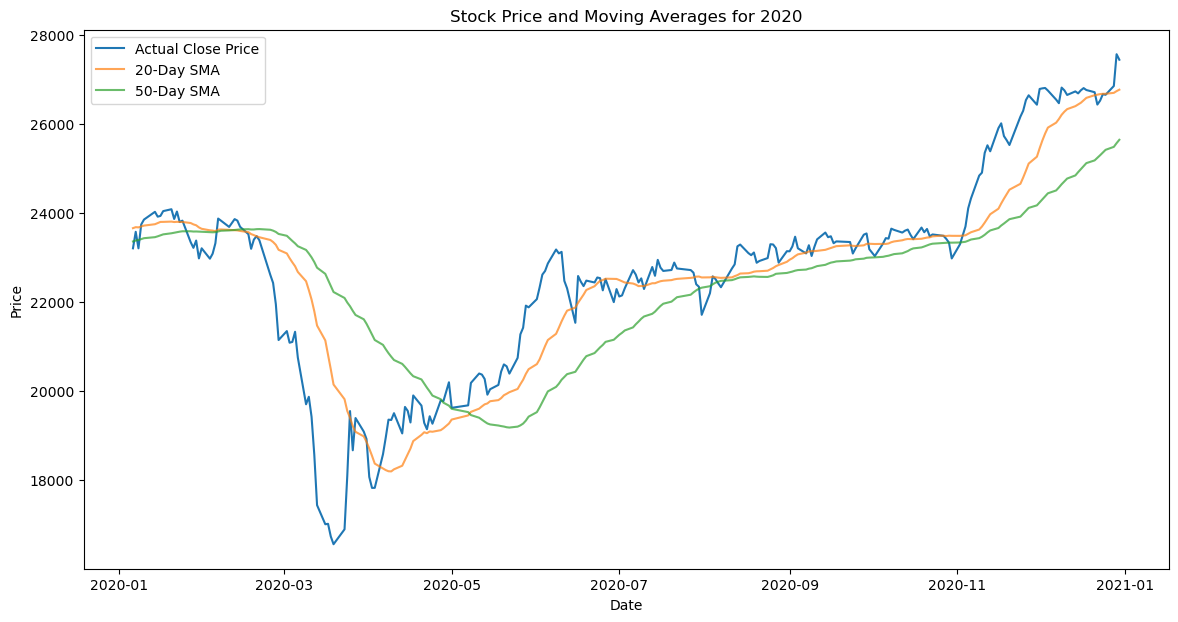

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# データの読み込み
df = pd.read_csv('japan_data.csv', index_col='Date', parse_dates=True)

# 短期移動平均（20日）長期移動平均（50日）
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

df_2020 = df.loc['2020']

# 移動平均と実際の株価をプロット
plt.figure(figsize=(14, 7))
plt.plot(df_2020['Close'], label='Actual Close Price')
plt.plot(df_2020['SMA_20'], label='20-Day SMA', alpha=0.7)
plt.plot(df_2020['SMA_50'], label='50-Day SMA', alpha=0.7)
plt.title('Stock Price and Moving Averages for 2020')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


Mean Squared Error for 2020: 829086.47


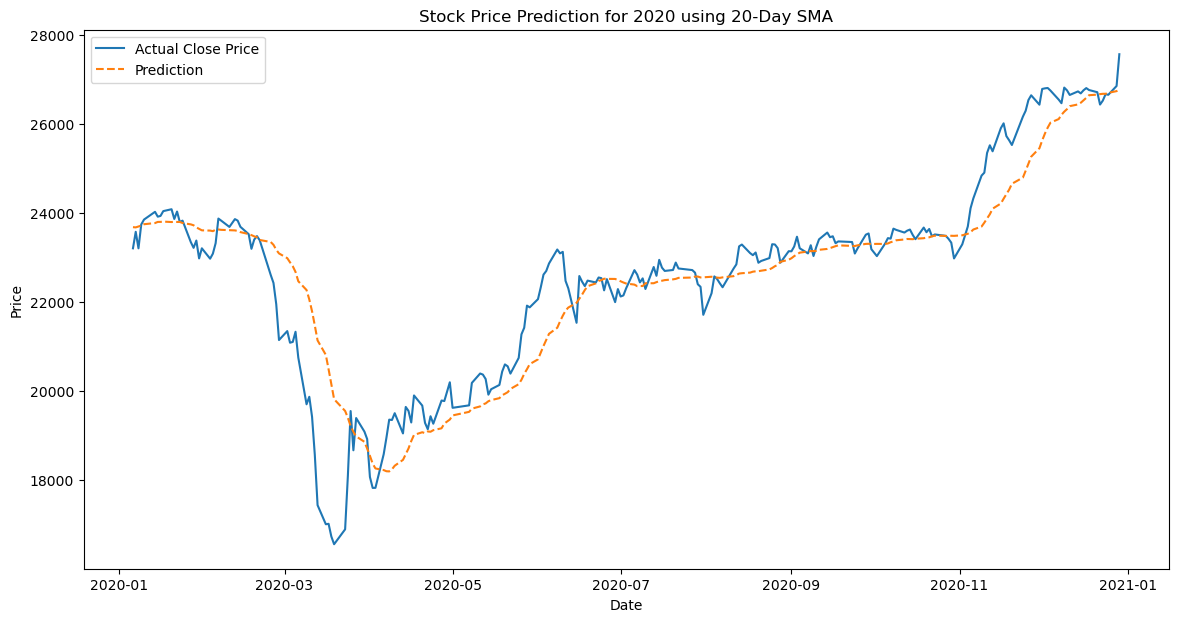

In [23]:
# 2020年のデータに限定
df_2020 = df.loc['2020'].copy()

# 2020年のデータに対して20日移動平均を1日先にシフトさせた予測値を計算
df_2020['Prediction'] = df_2020['SMA_20'].shift(-1)

# 予測値と実際の値の対応を取るためにNaNを削除
df_2020 = df_2020.dropna(subset=['Prediction'])

# 実際の値と予測値
actual_2020 = df_2020['Close']
predicted_2020 = df_2020['Prediction']

# MSE（平均二乗誤差）を計算
mse_2020 = mean_squared_error(actual_2020, predicted_2020)
print(f'Mean Squared Error for 2020: {mse_2020:.2f}')

# データをプロット
plt.figure(figsize=(14, 7))
plt.plot(df_2020['Close'], label='Actual Close Price')
plt.plot(df_2020['Prediction'], label='Prediction', linestyle='--')
plt.title('Stock Price Prediction for 2020 using 20-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
